In [1]:
## IMPORTS 
import evotoon
from data_classes import CatParam, IntParam, FloatParam

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns#

import random
import warnings
warnings.filterwarnings("ignore")

## MAKE SEED
SEED = evotoon.make_seed(465)

In [2]:
optimal_solutions = {
	"a280" : 2579,
	"ali535" : 202339,
	"att48" : 10628,
	"att532" : 27686,
	"bayg29" : 1610,
	"bays29" : 2020,
	"berlin52" : 7542,
	"bier127" : 118282,
	"brazil58" : 25395,
	"brd14051" : 469385,
	"brg180" : 1950,
	"burma14" : 3323,
	"ch130" : 6110,
	"ch150" : 6528,
	"d198" : 15780,
	"d493" : 35002,
	"d657" : 48912,
	"d1291" : 50801,
	"d1655" : 62128,
	"d2103" : 80450,
	"d15112" : 1573084,
	"d18512" : 645238,
	"dantzig42" : 699,
	"dsj1000" : 18659688, 
	"dsj1000" : 18660188,
	"eil51" : 426,
	"eil76" : 538,
	"eil101" : 629,
	"fl417" : 11861,
	"fl1400" : 20127,
	"fl1577" : 22249,
	"fl3795" : 28772,
	"fnl4461" : 182566,
	"fri26" : 937,
	"gil262" : 2378,
	"gr17" : 2085,
	"gr21" : 2707,
	"gr24" : 1272,
	"gr48" : 5046,
	"gr96" : 55209,
	"gr120" : 6942,
	"gr137" : 69853,
	"gr202" : 40160,
	"gr229" : 134602,
	"gr431" : 171414,
	"gr666" : 294358,
	"hk48" : 11461,
	"kroA100" : 21282,
	"kroB100" : 22141,
	"kroC100" : 20749,
	"kroD100" : 21294,
	"kroE100" : 22068,
	"kroA150" : 26524,
	"kroB150" : 26130,
	"kroA200" : 29368,
	"kroB200" : 29437,
	"lin105" : 14379,
	"lin318" : 42029,
	"linhp318" : 41345,
	"nrw1379" : 56638,
	"p654" : 34643,
	"pa561" : 2763,
	"pcb442" : 50778,
	"pcb1173" : 56892,
	"pcb3038" : 137694,
	"pla7397" : 23260728,
	"pla33810" : 66048945,
	"pla85900" : 142382641,
	"pr76" : 108159,
	"pr107" : 44303,
	"pr124" : 59030,
	"pr136" : 96772,
	"pr144" : 58537,
	"pr152" : 73682,
	"pr226" : 80369,
	"pr264" : 49135,
	"pr299" : 48191,
	"pr439" : 107217,
	"pr1002" : 259045,
	"pr2392" : 378032,
	"rat99" : 1211,
	"rat195" : 2323,
	"rat575" : 6773,
	"rat783" : 8806,
	"rd100" : 7910,
	"rd400" : 15281,
	"rl1304" : 252948,
	"rl1323" : 270199,
	"rl1889" : 316536,
	"rl5915" : 565530,
	"rl5934" : 556045,
	"rl11849" : 923288,
	"si175" : 21407,
	"si535" : 48450,
	"si1032" : 92650,
	"st70" : 675,
	"swiss42" : 1273,
	"ts225" : 126643,
	"tsp225" : 3916,
	"u159" : 42080,
	"u574" : 36905,
	"u724" : 41910,
	"u1060" : 224094,
	"u1432" : 152970,
	"u1817" : 57201,
	"u2152" : 64253,
	"u2319" : 234256,
	"ulysses16" : 6859,
	"ulysses22" : 7013,
	"usa13509" : 19982859,
	"vm1084" : 239297,
	"vm1748" : 336556,
}

In [34]:
separator = "--------------------------------------------------------"
## EXAMPLE WITH AntKnapsackClean-Master

# Env configuration
poblation_size = 25

# Parameter settings
float_params = [
	FloatParam("alpha", 1.0, 10.0, 3),
	FloatParam("beta", 1.0, 10.0, 3),	
	FloatParam("rho", 0.1, 1.0, 3),
]
int_params = [
	IntParam("ants", 5, 100),
	IntParam("nnls", 5, 50),
	IntParam("elitistants", 1, 750)
]
cat_params = [
	CatParam("localsearch", [0,1,2,3]),
	CatParam("dlb", [0,1])
]
all_params = float_params + int_params + cat_params
all_params = {param.name: param for param in all_params}

initial_batch = evotoon.initialization(poblation_size, float_params, int_params, cat_params)

# Tuner parameters

update_cycle = 3
budget = 1000

# SET ENVIRONMENT FOR THE ACO ALGORITHM TO TUNE
#path = "./ALL_tsp"
n = 1
m = 100

#instance_list = evotoon.choose_instances(path, n , SEED)

instance_list = [
 	'./ALL_tsp/ch150.tsp',
	'./ALL_tsp/u724.tsp',
	'./ALL_tsp/rl1323.tsp',
	'./ALL_tsp/st70.tsp',
	'./ALL_tsp/d1655.tsp',
	'./ALL_tsp/u1817.tsp',
	'./ALL_tsp/kroB200.tsp',
	'./ALL_tsp/gr96.tsp',
	'./ALL_tsp/pr226.tsp',
	'./ALL_tsp/gr431.tsp',
	'./ALL_tsp/gr137.tsp',
	'./ALL_tsp/att532.tsp',
	'./ALL_tsp/rd100.tsp',
	'./ALL_tsp/rd400.tsp',
	'./ALL_tsp/pcb1173.tsp',
	'./ALL_tsp/eil76.tsp',
	'./ALL_tsp/pr264.tsp',
	'./ALL_tsp/pr439.tsp',
	'./ALL_tsp/u574.tsp',
	'./ALL_tsp/bier127.tsp',
]

instance_list, seed_list = evotoon.select_seeds(instance_list, m, SEED)
optimal_list = [optimal_solutions[instance[:-4].split("/")[-1]] for instance in instance_list]
# print(separator, "Instances running and seeds", separator)
# for ins, seed, optimal in zip(instance_list,seed_list, optimal_list):
# 	print("instance:", ins, "seed:", seed, "optimal", optimal)


function_kwargs = {
	"executable_path": "./ACOTSP-master/acotsp",
	"instance_list": instance_list,
	"seed_list": seed_list,
	"optimal_list": optimal_list,
}




In [6]:
a = 0
for i in range(1,9):
	for j in range(1,17):
		model_kwargs = {
			"layers": i,
			"neurons": i * [j]
		}
		df = evotoon.evo_tunning(all_params=all_params, float_params=float_params, int_params=int_params, cat_params=cat_params, budget=budget, poblation_size=poblation_size, initial_batch=initial_batch, execute_algorithm=evotoon.execute_ACOTSP, model_kwargs=model_kwargs, returning_type="ABSOLUTE_OPTIMAL_DIFF", **function_kwargs)
		df.to_csv(f'./acotsp_model_exp/layers_{i}-neurons_{j}.txt', sep='\t', index=False)
		a = a+1
		print(f"{a}/{8*16}", end='\r')
		

Total Budget: 875
Budget left 875
------------------------------------------------------------------------------------------------
Budget left 750
------------------------------------------------------------------------------------------------
Budget left 625
------------------------------------------------------------------------------------------------
Budget left 500
------------------------------------------------------------------------------------------------
Budget left 375
------------------------------------------------------------------------------------------------
Budget left 250
------------------------------------------------------------------------------------------------
Budget left 125
------------------------------------------------------------------------------------------------
Total Budget: 875
Budget left 875
------------------------------------------------------------------------------------------------
Budget left 750
--------------------------------------------

In [3]:
def get_best_confs(folder):
	cols = ["alpha", "beta", "rho", "ants", "nnls", "elitistants", "localsearch", "dlb", "Step_Found", "VALUE"]

	df = pd.DataFrame()
	for file in sorted(os.listdir(folder)):
		path = folder + file
		df = df.append(pd.read_csv(path, usecols= cols, sep='\t').iloc[0])

	return df.reset_index(drop=True)

def run_acotsp(save_folder, seed, alpha, beta, rho, ants, nnls, elitistants, localsearch, dlb):
	instance_list = [
		"./ALL_tsp/a280.tsp",
		"./ALL_tsp/ali535.tsp",
		"./ALL_tsp/att48.tsp",
		"./ALL_tsp/d1655.tsp",
		"./ALL_tsp/eil101.tsp",
		"./ALL_tsp/eil51.tsp",
		"./ALL_tsp/gr202.tsp",
		"./ALL_tsp/gr229.tsp",
		"./ALL_tsp/gr431.tsp",
		"./ALL_tsp/gr666.tsp",
		"./ALL_tsp/kroA150.tsp",
		"./ALL_tsp/kroB100.tsp",
		"./ALL_tsp/kroB150.tsp",
		"./ALL_tsp/kroB200.tsp",
		"./ALL_tsp/p654.tsp",
		"./ALL_tsp/pcb1173.tsp",
		"./ALL_tsp/pr124.tsp",
		"./ALL_tsp/pr136.tsp",
		"./ALL_tsp/pr264.tsp",
		"./ALL_tsp/pr76.tsp",
		"./ALL_tsp/rat575.tsp",
		"./ALL_tsp/rat99.tsp",
		"./ALL_tsp/rd100.tsp",
		"./ALL_tsp/rl1304.tsp",
		"./ALL_tsp/rl1323.tsp",
		"./ALL_tsp/u1432.tsp",
		"./ALL_tsp/vm1748.tsp",
	]
	if not os.path.exists(save_folder):
		os.makedirs(save_folder)
	for file in instance_list:
		f_name = file.split("/")[-1].split(".")[0]
		f = open(save_folder+"/"+f_name+"-"+str(seed)+".txt", "a")
		try:
			out = evotoon.execute_ACOTSP(file, seed, optimal_solutions[f_name], "./ACOTSP-master/acotsp", alpha, beta, rho, ants, nnls, elitistants, localsearch, dlb) * -1
		except:
			out = str((file, seed, optimal_solutions[f_name], "./ACOTSP-master/acotsp", alpha, beta, rho, ants, nnls, elitistants, localsearch, dlb))
		f.write(str(out)+"\n")
		f.close()

def get_evaluations(folder):
	all_lines = []
	indexes = []
	for file in os.listdir(folder):
		file_path = os.path.join(folder, file)
		f = open(file_path, "r")
		lines = f.readlines()[0]
		lines = [float(lines.rstrip("\n"))]
		all_lines = all_lines + lines
		indexes = indexes + [f"{file}_{i}" for i, line in enumerate(lines)]
	return pd.Series(all_lines, index=indexes)

In [4]:
path = "./model_test/acotsp_executions/"
df = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df = pd.concat([df, get_evaluations(path+folder)], axis=1)

df.columns = [f"conf_c{i}_n{j}" for i in range(1, 9) for j in range(1, 17)]
df

,conf_c1_n1,conf_c1_n2,conf_c1_n3,conf_c1_n4,conf_c1_n5,conf_c1_n6,conf_c1_n7,conf_c1_n8,conf_c1_n9,conf_c1_n10,...,conf_c8_n7,conf_c8_n8,conf_c8_n9,conf_c8_n10,conf_c8_n11,conf_c8_n12,conf_c8_n13,conf_c8_n14,conf_c8_n15,conf_c8_n16
d1655-465.txt_0,1.109001,1.240986,1.371362,1.487252,1.355267,1.447013,1.092905,1.574169,1.482423,1.192699,...,0.299382,0.812838,0.492532,0.946433,0.664757,1.144412,0.635784,0.598764,0.577839,0.606812
vm1748-468.txt_0,1.324594,1.857640,0.909804,1.416703,1.961338,1.972331,2.331261,1.979463,2.592139,3.053578,...,0.726179,1.999370,0.581181,1.775336,0.595443,1.726310,0.570485,0.604654,0.838791,1.380751
rl1304-466.txt_0,0.882395,1.621677,1.173759,0.211111,0.997438,0.453058,1.565935,0.690260,0.887534,2.217452,...,0.072742,0.135996,0.069975,0.752724,0.382687,0.443965,0.000000,0.504847,0.239970,0.072742
pr124-465.txt_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kroB150-469.txt_0,0.042097,0.000000,0.000000,0.000000,0.007654,0.000000,0.042097,0.000000,0.007654,0.000000,...,0.065059,0.022962,0.065059,0.000000,0.000000,0.000000,0.007654,0.000000,0.091848,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p654-466.txt_0,0.054845,0.086598,0.213607,0.057732,0.057732,0.051959,0.184742,0.051959,0.028866,0.213607,...,0.051959,0.075051,0.023093,0.101031,0.080824,0.098144,0.086598,0.000000,0.034639,0.051959
pr124-468.txt_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kroB200-466.txt_0,0.000000,0.000000,0.000000,0.142678,0.000000,0.000000,0.027177,0.000000,0.000000,0.000000,...,0.067942,0.193634,1.141421,0.000000,0.757550,0.000000,0.193634,0.363488,0.193634,0.003397
vm1748-465.txt_0,1.053317,2.048693,1.449982,1.601517,1.709671,1.567644,1.807426,2.140208,2.026409,2.388607,...,1.049751,1.735818,0.491152,1.850806,0.836711,1.152260,0.899107,0.550874,0.791547,1.150774


In [5]:
df = df.rank(axis=1, numeric_only=True)
df = df * -1

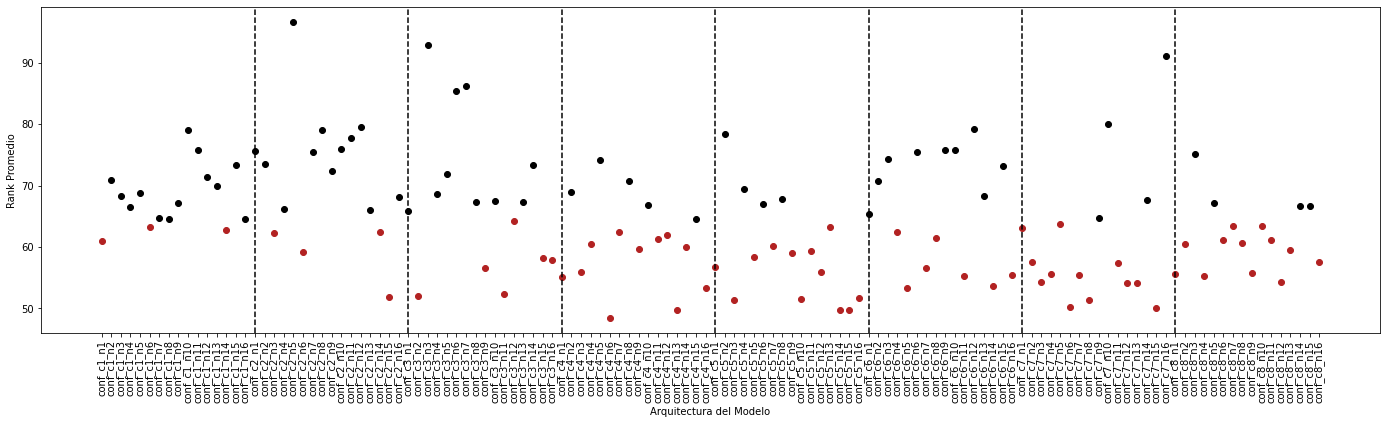

In [21]:
x = df.columns
y = [-1*sum(df[a])/len(df[a]) for a in df]
colors = ["firebrick" if i in df_final.columns else "black" for i in x]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank Promedio")
for i in range(1,8):
	plt.axvline(16*i, color = 'black', linestyle = '--')
for a,b,c in zip(x,y,colors):
	plt.scatter(a, b, color=c)



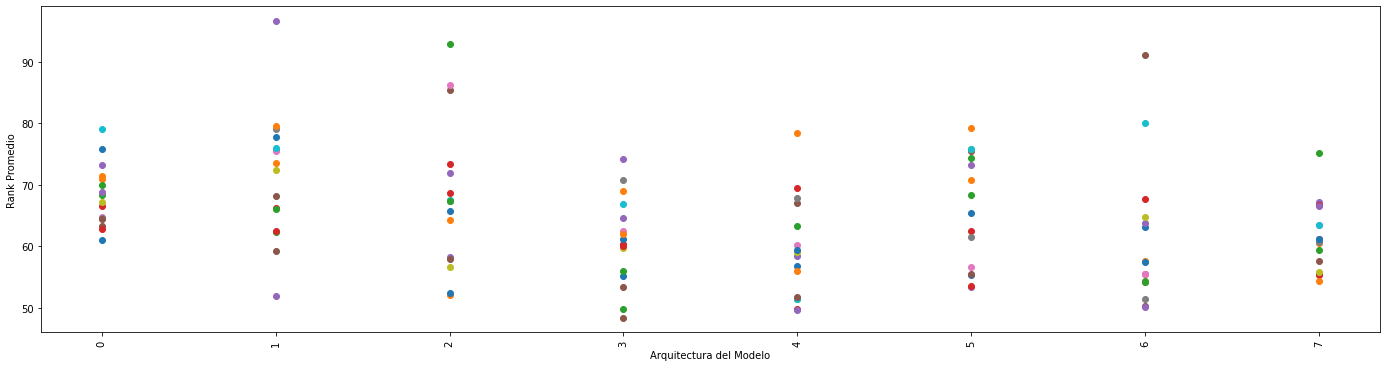

In [7]:

for i in range(1,17):
	x = [conf for j, conf in enumerate(df.columns) if int(conf.replace("n","").split("_")[2])==i]
	y = [-1*sum(df[a])/len(df[a]) for a in x]
	# colors = ["firebrick" if i in df_final.columns else "black" for i in x]
	plt.rcParams["figure.figsize"] = (24,6)
	plt.xticks(rotation=90)
	plt.xlabel("Arquitectura del Modelo")
	plt.ylabel("Rank Promedio")
	#plt.subplot(16, 1, i)
	plt.scatter(list(range(8)),y)
	# for i in range(1,8):
	# 	plt.axvline(16*i, color = 'black', linestyle = '--')
	# for a,b,c in zip(x,y,colors):
	# 	plt.scatter(a, b, color=c)
plt.show()



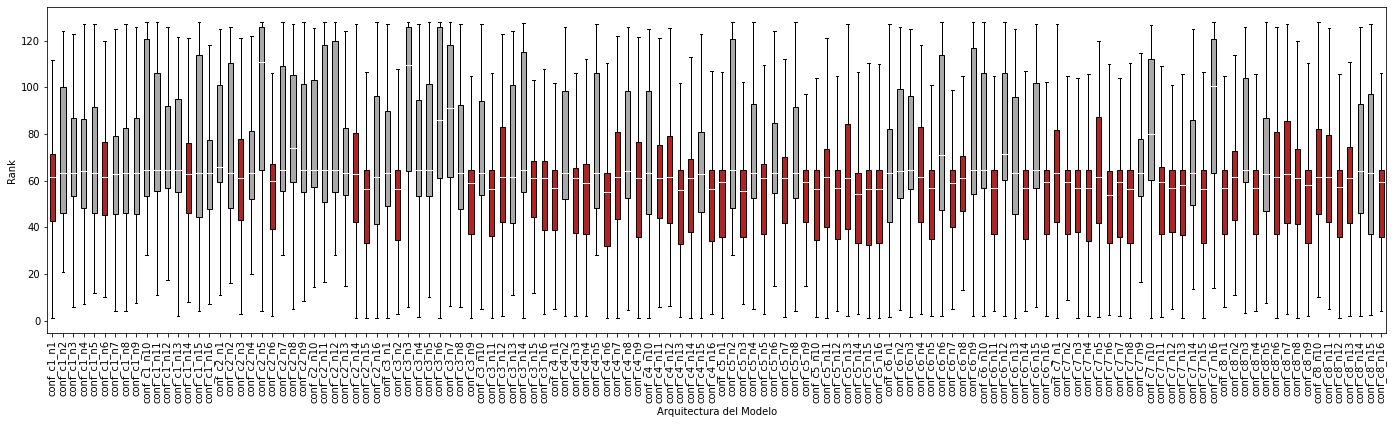

In [22]:
x = df.columns
y = [-1*df[a] for a in df]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank")


a = plt.boxplot(y, labels=x, patch_artist=True, showfliers=False)

for label, box in zip(x,a["boxes"]):
	if label in df_final.columns:
		box.set_facecolor("firebrick")
	else:
		box.set_facecolor("darkgray")

for median in a['medians']:
    median.set_color('white')

In [9]:
# compare samples
args = tuple(df[conf] for conf in df)

stat, p = friedmanchisquare(*args)

# interpret
alpha = 0.05
if p < alpha:
    # Different distributions (reject H0)
    posthoc_matrix = sp.posthoc_conover(
        pd.melt(df, var_name="configuration", value_name="rank"),
        val_col="rank",
        group_col="configuration",
        p_adjust="holm",
    )
    different_dists = posthoc_matrix.index[
        posthoc_matrix[df.sum().idxmax()] < 0.05
    ].tolist()
    df_final = df.drop(different_dists, axis=1)

In [10]:
path = "./testing/acotsptesting/evotoon/"
df_evotoon = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_evotoon = pd.concat([df_evotoon, get_evaluations(path+folder)], axis=1)

df_evotoon.columns = [f"evo_{i}" for i in range(1, 6)]
df_evotoon


,evo_1,evo_2,evo_3,evo_4,evo_5
gr431-769.txt_0,0.053671,0.320861,0.081674,0.000000,0.008751
pcb1173-767.txt_0,0.762849,2.031920,0.732968,1.014202,1.251494
gr229-768.txt_0,0.047548,0.148586,0.047548,0.031203,0.000000
rat99-765.txt_0,0.082576,0.082576,0.000000,0.000000,0.000000
gr229-769.txt_0,0.047548,0.031203,0.047548,0.000000,0.000000
...,...,...,...,...,...
a280-767.txt_0,0.000000,0.387747,0.077549,0.077549,0.077549
rat99-768.txt_0,0.000000,0.165153,0.000000,0.000000,0.000000
rat99-769.txt_0,0.082576,0.165153,0.000000,0.000000,0.000000
gr229-765.txt_0,0.000000,0.116640,0.047548,0.000000,0.047548


In [11]:
path = "./testing/acotsptesting/irace/"
df_irace = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_irace = pd.concat([df_irace, get_evaluations(path+folder)], axis=1)

df_irace.columns = [f"irace_{i}" for i in range(1, 6)]
df_irace


,irace_1,irace_2,irace_3,irace_4,irace_5
gr431-769.txt_0,0.028586,0.000000,0.004084,0.066506,0.072339
pcb1173-767.txt_0,0.217957,0.648597,0.272446,0.435914,0.706602
gr229-768.txt_0,0.031203,0.000000,0.031203,0.072064,0.000000
rat99-765.txt_0,0.082576,0.000000,0.082576,0.000000,0.082576
gr229-769.txt_0,0.000000,0.000000,0.000000,0.010401,0.000000
...,...,...,...,...,...
a280-767.txt_0,0.155099,0.077549,0.814269,0.000000,1.046917
rat99-768.txt_0,0.000000,0.000000,0.743187,0.000000,0.165153
rat99-769.txt_0,0.082576,0.000000,0.082576,0.000000,0.082576
gr229-765.txt_0,0.010401,0.000000,0.047548,0.047548,0.047548


In [12]:
path = "./testing/acotsptesting/smac/"
df_smac = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_smac = pd.concat([df_smac, get_evaluations(path+folder)], axis=1)

df_smac.columns = [f"smac_{i}" for i in range(1, 6)]
df_smac


,smac_1,smac_2,smac_3,smac_4,smac_5
gr431-769.txt_0,0.028586,0.001167,0.077007,0.028586,0.031503
pcb1173-767.txt_0,1.687408,0.952682,0.486887,1.402658,0.906982
gr229-768.txt_0,0.010401,0.041604,0.000000,0.217679,0.031203
rat99-765.txt_0,0.165153,0.082576,0.000000,0.082576,0.165153
gr229-769.txt_0,0.166417,0.031203,0.031203,0.118869,0.435358
...,...,...,...,...,...
a280-767.txt_0,0.581621,1.318340,0.000000,1.085692,1.667313
rat99-768.txt_0,0.082576,0.165153,0.000000,0.082576,2.064410
rat99-769.txt_0,0.000000,0.082576,0.000000,0.082576,1.568951
gr229-765.txt_0,0.148586,0.041604,0.031203,0.310545,0.939808


In [30]:
df_r = pd.concat([df_evotoon, df_irace, df_smac], axis=1)
bans = [index.split("_")[0] for index in df.index]
for tag, val in df_r.iterrows():
	a = tag.split("_")[0]
	if a in bans:
		df_r.drop(tag, inplace=True)
df_r = df_r.rank(axis=1, numeric_only=True)
df_r

,evo_1,evo_2,evo_3,evo_4,evo_5,irace_1,irace_2,irace_3,irace_4,irace_5,smac_1,smac_2,smac_3,smac_4,smac_5
gr431-769.txt_0,10.0,15.0,14.0,1.5,5.0,7.0,1.5,4.0,11.0,12.0,7.0,3.0,13.0,7.0,9.0
pcb1173-767.txt_0,8.0,15.0,7.0,11.0,12.0,1.0,5.0,2.0,3.0,6.0,14.0,10.0,4.0,13.0,9.0
gr229-768.txt_0,11.5,14.0,11.5,7.5,2.5,7.5,2.5,7.5,13.0,2.5,5.0,10.0,2.5,15.0,7.5
rat99-765.txt_0,10.0,10.0,3.5,3.5,3.5,10.0,3.5,10.0,3.5,10.0,14.5,10.0,3.5,10.0,14.5
gr229-769.txt_0,11.5,9.0,11.5,3.5,3.5,3.5,3.5,3.5,7.0,3.5,14.0,9.0,9.0,13.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a280-767.txt_0,2.0,9.0,5.5,5.5,5.5,8.0,5.5,11.0,2.0,12.0,10.0,14.0,2.0,13.0,15.0
rat99-768.txt_0,4.5,12.0,4.5,4.5,4.5,4.5,4.5,14.0,4.5,12.0,9.5,12.0,4.5,9.5,15.0
rat99-769.txt_0,10.5,14.0,4.0,4.0,4.0,10.5,4.0,10.5,4.0,10.5,4.0,10.5,4.0,10.5,15.0
gr229-765.txt_0,2.0,12.0,9.0,2.0,9.0,4.0,2.0,9.0,9.0,9.0,13.0,6.0,5.0,14.0,15.0


In [31]:
a = [col for col in df_r.columns if 'evo' in col]
b = [col for col in df_r.columns if 'irace' in col]
c = [col for col in df_r.columns if 'smac' in col]

df_r = pd.lreshape(df_r, {'evo' : a, 'irace' : b, 'smac': c})
df_r

,evo,irace,smac
0,10.0,7.0,7.0
1,8.0,1.0,14.0
2,11.5,7.5,5.0
3,10.0,10.0,14.5
4,11.5,3.5,14.0
...,...,...,...
670,5.5,12.0,15.0
671,4.5,12.0,15.0
672,4.0,10.5,15.0
673,9.0,9.0,15.0


In [19]:
df_r = df_r.rank(axis=1, numeric_only=True)
df_r = df_r * -1

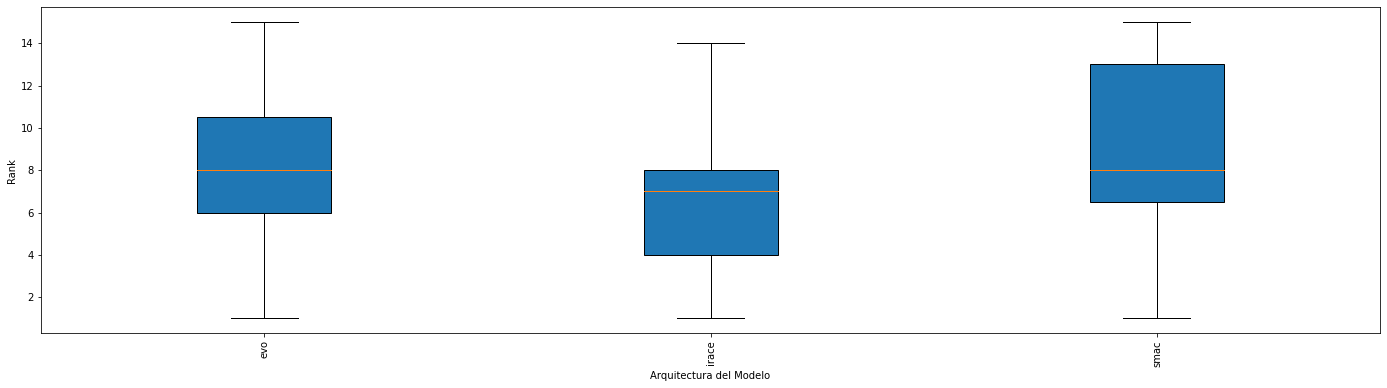

In [32]:
x = df_r.columns
y = [df_r[a] for a in df_r]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank")


a = plt.boxplot(y, labels=x, patch_artist=True, showfliers=False)

In [20]:
df_r

,evo,irace,smac
0,-3.0,-1.5,-1.5
1,-2.0,-1.0,-3.0
2,-3.0,-2.0,-1.0
3,-1.5,-1.5,-3.0
4,-2.0,-1.0,-3.0
...,...,...,...
670,-1.0,-2.0,-3.0
671,-1.0,-2.0,-3.0
672,-1.0,-2.0,-3.0
673,-1.5,-1.5,-3.0


In [54]:
df_r.sum()

evo     -1365.0
irace   -1166.5
smac    -1518.5
dtype: float64

In [50]:

# compare samples
args = tuple(df[conf] for conf in df)

stat, p = friedmanchisquare(*args)

# interpret
alpha = 0.05
if p < alpha:
    # Different distributions (reject H0)
    posthoc_matrix = sp.posthoc_conover(
        pd.melt(df_r, var_name="configuration", value_name="rank"),
        val_col="rank",
        group_col="configuration",
        p_adjust="holm",
    )
    different_dists = posthoc_matrix.index[
        posthoc_matrix[df_r.sum().idxmax()] < 0.05
    ].tolist()
    df_r.drop(different_dists, axis=1, inplace=True)

df_r

,irace
0,-1.5
1,-1.0
2,-2.0
3,-1.5
4,-1.0
...,...
670,-2.0
671,-2.0
672,-2.0
673,-1.5
